# Section A - Problem Definition & Data Preparation

## Data Preprocessing Pipline

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Importing the dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Sanity check of data

In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape #No. of rows and columns

(891, 12)

In [5]:
df.isnull().sum()  #Checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()  #Checking for duplicate rows

np.int64(0)

In [7]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print('---'*10)

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
------------------------------
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
3734

### Explotary Data Analysis(EDA)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


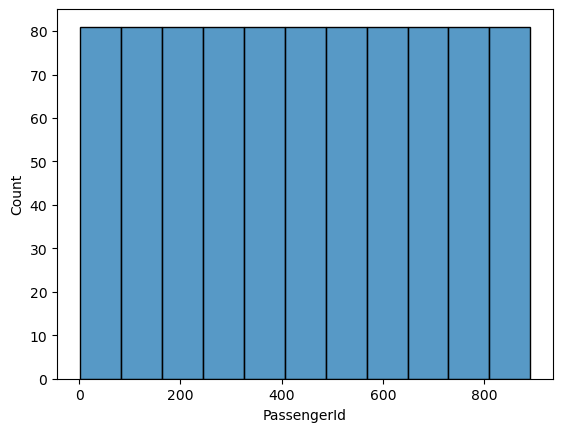

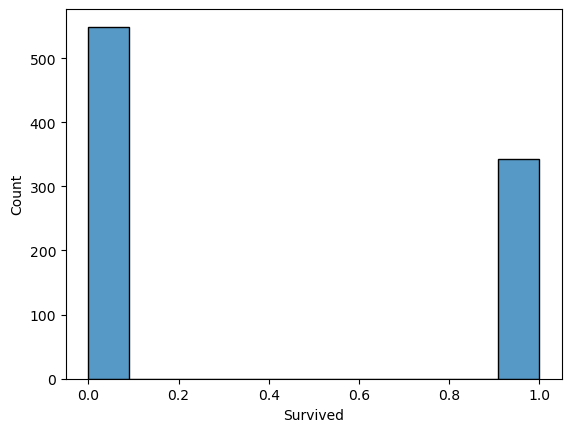

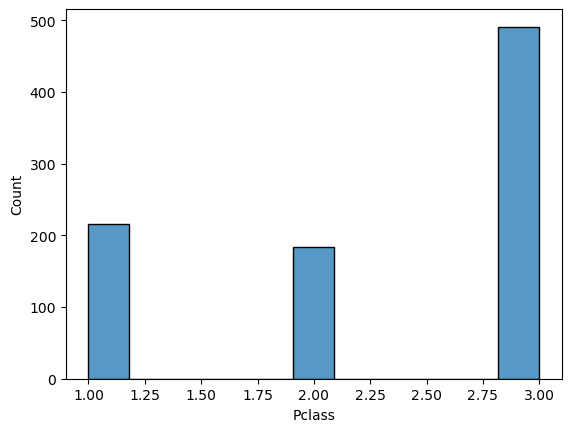

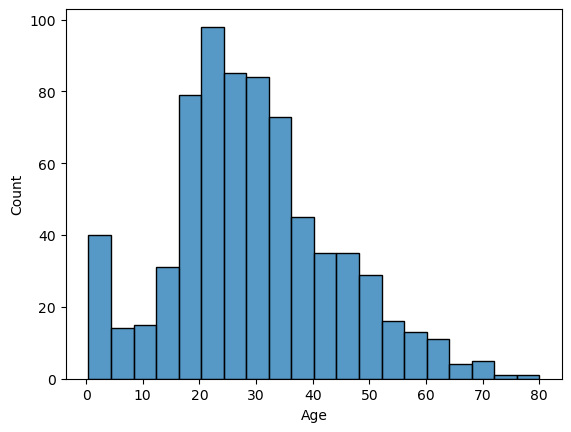

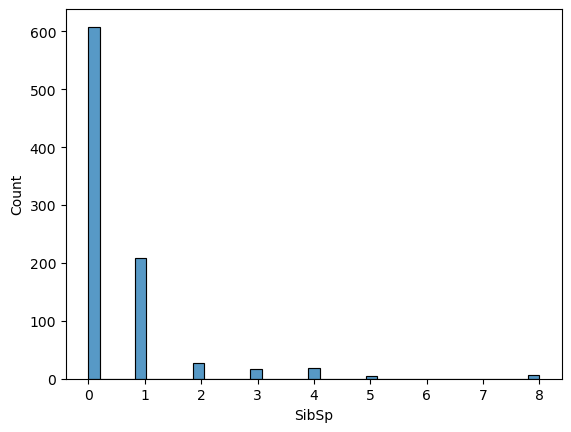

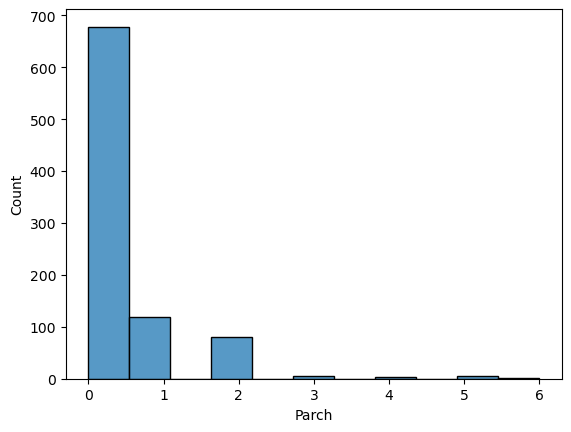

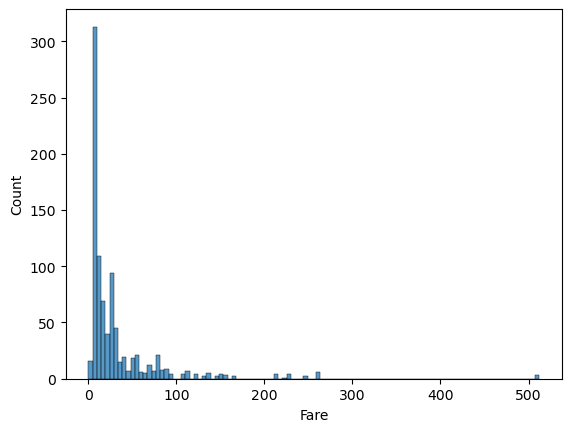

In [10]:
for i in df.select_dtypes(include="number").columns:
   sns.histplot(data=df,x=i)
   plt.show()

### Check for outliers

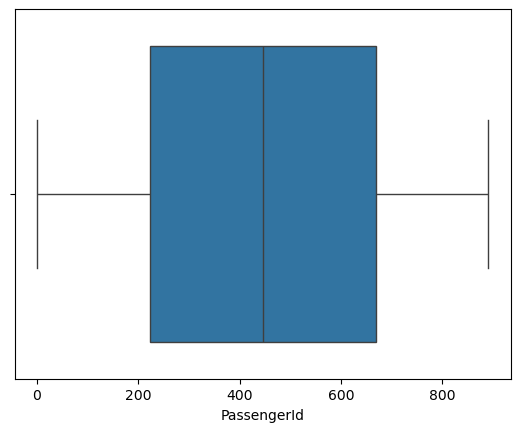

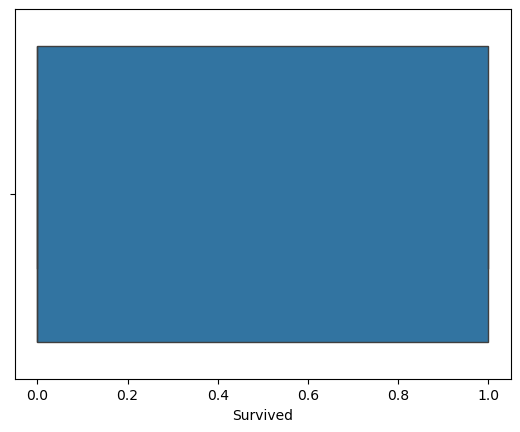

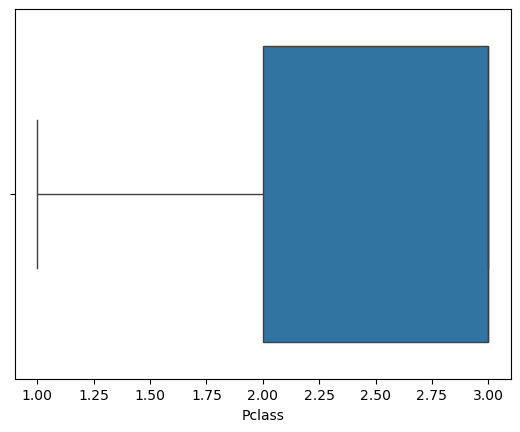

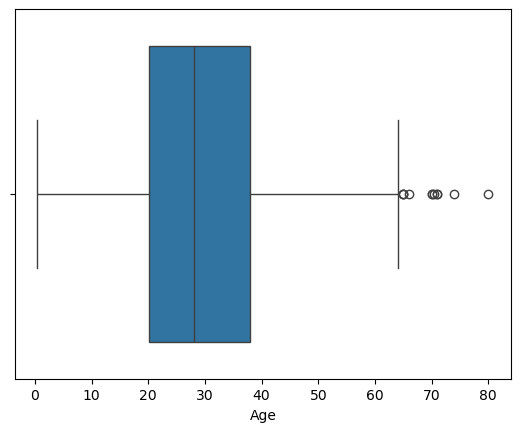

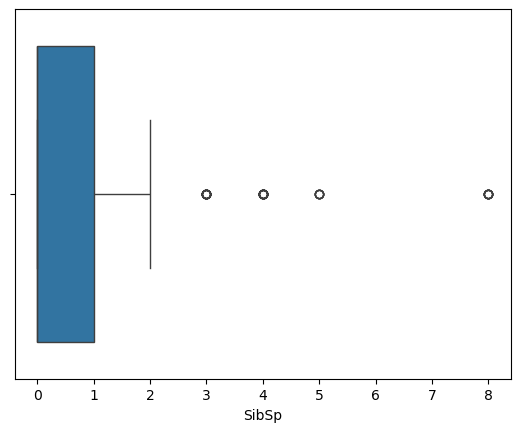

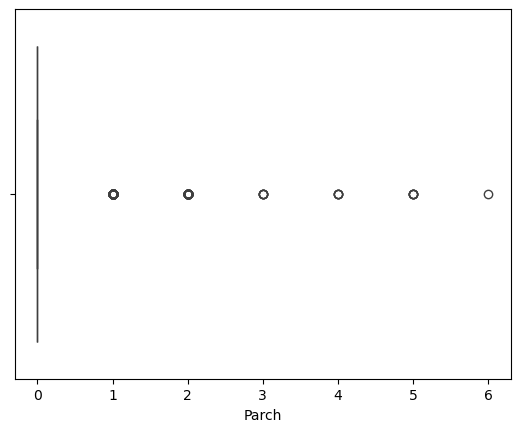

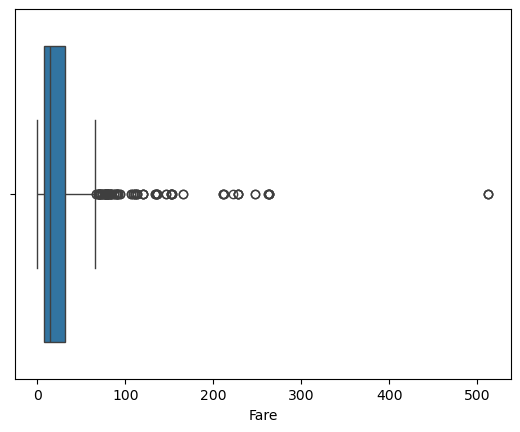

In [11]:
for i in df.select_dtypes(include="number").columns:
   sns.boxplot(data=df,x=i)
   plt.show()

#### Check the Relationship between the target variable and the features

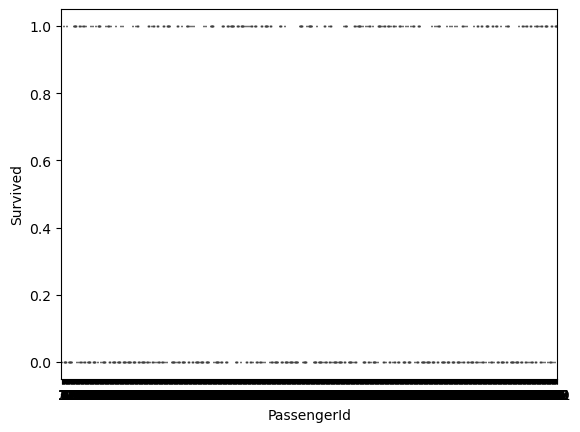

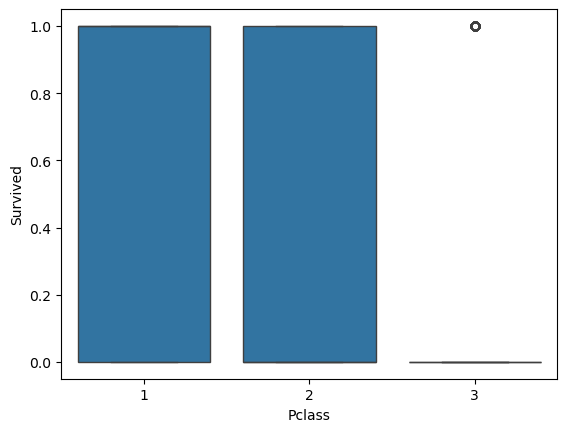

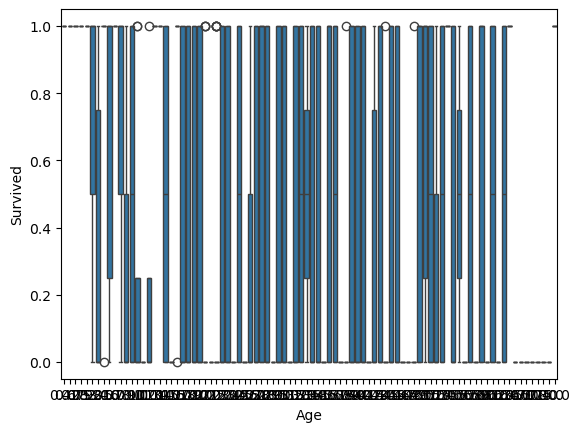

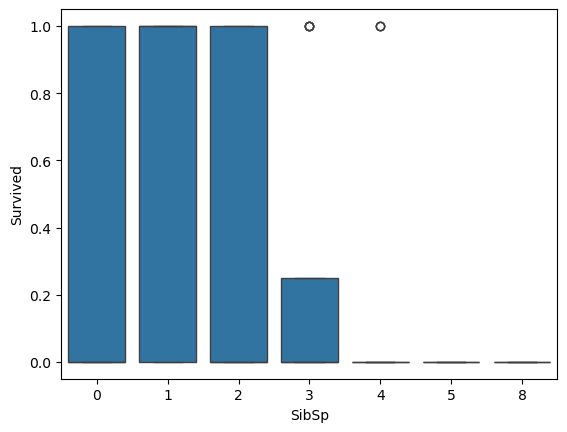

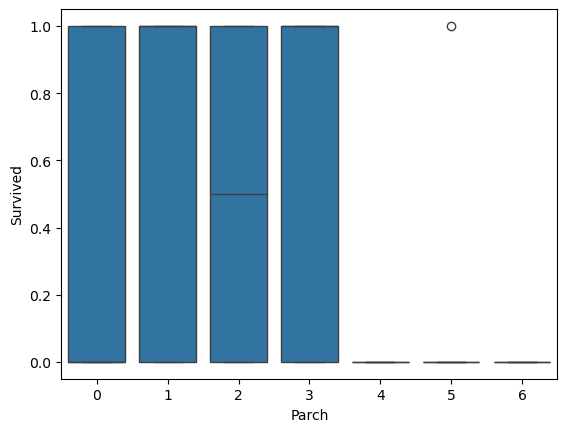

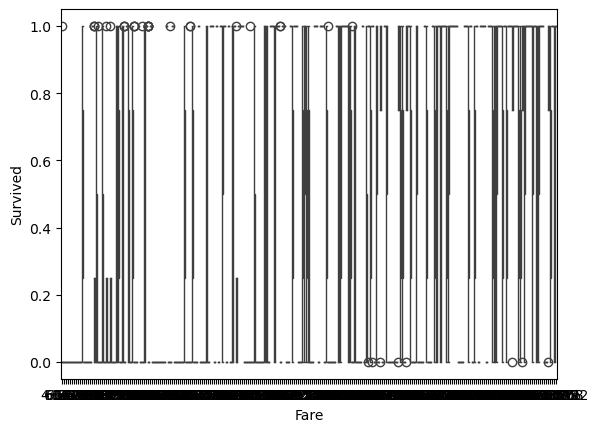

In [12]:
df.select_dtypes(include="number").columns
for i in ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    sns.boxplot(data=df,x=i,y='Survived')
    plt.show()

## Handling missing values

In [13]:
df.isnull().sum()  #Checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
"""
Handling missing values
Filling missing values in 'Age' with median value of 'Age' beacause 'Age' is a numerical column and median is less affected by outliers
Filling missing values in 'Embarked' with mode value of 'Embarked' because 'Embarked' is a categorical column and mode is the most frequent value
Dropping 'Cabin' column as it has more than 50% missing values and it is not a very important feature for predicting survival

"""
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
  

In [15]:
df.isnull().sum() #Checking for missing values after handling them

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)  #Dropping duplicate rows if any
df.duplicated().sum()  #Checking for duplicate rows after dropping them

np.int64(0)

## Encoding of Data

In [17]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

embarked_mapping = {"S" : 1 , "C" : 2 , "Q" : 3}

for df_set in [df]:
    df_set['Embarked'] = df_set['Embarked'].map(embarked_mapping)


df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [18]:

df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

## Train/Test Split Dataset

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']

SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)
name_list = X_test['Name']

for df_set in [X_train, X_test]:
    df_set.drop('Name', axis=1, inplace=True)


    
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
name_list.to_csv("names_list.csv", index=False)



print(X)
print("--------")
print(y)
print("--------")
print(X_test)
print("--------")
print(y_test)


     Pclass                                               Name  Sex   Age  \
0         3                            Braund, Mr. Owen Harris    1  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2         3                             Heikkinen, Miss. Laina    0  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4         3                           Allen, Mr. William Henry    1  35.0   
..      ...                                                ...  ...   ...   
886       2                              Montvila, Rev. Juozas    1  27.0   
887       1                       Graham, Miss. Margaret Edith    0  19.0   
888       3           Johnston, Miss. Catherine Helen "Carrie"    0  28.0   
889       1                              Behr, Mr. Karl Howell    1  26.0   
890       3                                Dooley, Mr. Patrick    1  32.0   

     SibSp  Parch     Fare  Embarked  
0        1      0   7.2500         1